In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
import keras
from tensorflow.keras.layers import *
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.set_option('display.unicode.east_asian.width', True)
from matplotlib import font_manager, rc

In [104]:
# 폰트
font_path = '../etc/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font_name)

In [105]:
data = pd.read_csv('../datasets/prep_total.csv', index_col= 0)
data.columns

Index(['성별', '생년', '검진년도', '검진 시 연령', '키', '체중', '허리둘레',
       'BMI', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '요단백', '헤모글로빈', '공복혈당', '총콜레스테롤', 'HDL',
       '중성지방', 'LDL', '혈청크레아티닌', '신사구체여과율', 'AST', 'ALT',
       'GTP', '폐결핵흉부질환'],
      dtype='object')

In [106]:
df = data[['검진 시 연령','키','체중','허리둘레','총콜레스테롤']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1068 entries, M0 to F30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   검진 시 연령  1068 non-null   int64  
 1   키        1068 non-null   float64
 2   체중       1068 non-null   float64
 3   허리둘레     1067 non-null   float64
 4   총콜레스테롤   902 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 50.1+ KB


In [107]:
df

,검진 시 연령,키,체중,허리둘레,총콜레스테롤
고유값,,,,,
M0,34,174.0,64.0,72.0,194.0
M0,35,175.0,68.0,79.0,182.0
M0,36,175.0,68.0,76.0,176.0
M0,37,175.0,81.0,92.0,203.0
M0,38,175.0,86.0,96.0,205.0
...,...,...,...,...,...
F30,45,154.0,54.0,75.0,213.0
F30,46,154.0,55.0,70.0,225.0
F30,47,153.6,54.2,69.0,197.0


In [108]:
test_data = df[['검진 시 연령','키','체중','허리둘레','총콜레스테롤']]

In [109]:
test_data.dropna(axis= 'rows', inplace= True)
test_data.reset_index(drop= True, inplace= True)
test_data

,검진 시 연령,키,체중,허리둘레,총콜레스테롤
0,34,174.0,64.0,72.0,194.0
1,35,175.0,68.0,79.0,182.0
2,36,175.0,68.0,76.0,176.0
3,37,175.0,81.0,92.0,203.0
4,38,175.0,86.0,96.0,205.0
...,...,...,...,...,...
897,44,153.0,53.0,70.0,209.0
898,45,154.0,54.0,75.0,213.0
899,46,154.0,55.0,70.0,225.0
900,47,153.6,54.2,69.0,197.0


In [110]:
X = test_data[['검진 시 연령','키','체중','허리둘레']]
Y = test_data[['총콜레스테롤']]

In [111]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

scaled_X = minmaxscaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns= ['검진 시 연령','키','체중','허리둘레'])
# scaled_X.head()

scaled_Y = minmaxscaler.fit_transform(Y)
scaled_Y = pd.DataFrame(scaled_Y, columns = ['총콜레스테롤'])
scaled_Y.head()

,총콜레스테롤
0,0.387500
1,0.337500
2,0.312500
3,0.425000
4,0.433333


In [112]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size= 0.2, random_state= 777)
X_train.shape, X_test.shape, Y_train.shape

((721, 4), (181, 4), (721, 1))

In [113]:
# 모델링
model = Sequential()

model.add(Dense(512, input_dim=4, activation= 'relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation= 'relu'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               2560      
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 166,913
Trainable params: 166,913
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
model.compile(optimizer= 'adam', loss= 'mse')
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience= 20)
fit_hist = model.fit(X_train, Y_train, batch_size=50, epochs=200, validation_split=0.2, verbose=1, callbacks = [early_stop])

Train on 576 samples, validate on 145 samples
Epoch 1/200
576/576 [==============================] - 1s 1ms/sample - loss: 0.0561 - val_loss: 0.0301
Epoch 2/200
576/576 [==============================] - 0s 121us/sample - loss: 0.0275 - val_loss: 0.0239
Epoch 3/200
576/576 [==============================] - 0s 102us/sample - loss: 0.0248 - val_loss: 0.0226
Epoch 4/200
576/576 [==============================] - 0s 97us/sample - loss: 0.0238 - val_loss: 0.0218
Epoch 5/200
576/576 [==============================] - 0s 99us/sample - loss: 0.0230 - val_loss: 0.0209
Epoch 6/200
576/576 [==============================] - 0s 102us/sample - loss: 0.0226 - val_loss: 0.0206
Epoch 7/200
576/576 [==============================] - 0s 102us/sample - loss: 0.0232 - val_loss: 0.0201
Epoch 8/200
576/576 [==============================] - 0s 99us/sample - loss: 0.0218 - val_loss: 0.0210
Epoch 9/200
576/576 [==============================] - 0s 102us/sample - loss: 0.0229 - val_loss: 0.0247
Epoch 10/200
5

576/576 [==============================] - 0s 126us/sample - loss: 0.0166 - val_loss: 0.0176
Epoch 79/200
576/576 [==============================] - 0s 126us/sample - loss: 0.0165 - val_loss: 0.0177
Epoch 80/200
576/576 [==============================] - 0s 126us/sample - loss: 0.0165 - val_loss: 0.0174
Epoch 81/200
576/576 [==============================] - 0s 126us/sample - loss: 0.0162 - val_loss: 0.0175
Epoch 82/200
576/576 [==============================] - 0s 145us/sample - loss: 0.0156 - val_loss: 0.0184
Epoch 83/200
576/576 [==============================] - 0s 130us/sample - loss: 0.0169 - val_loss: 0.0179
Epoch 84/200
576/576 [==============================] - 0s 130us/sample - loss: 0.0164 - val_loss: 0.0177
Epoch 85/200
576/576 [==============================] - 0s 121us/sample - loss: 0.0159 - val_loss: 0.0171
Epoch 86/200
576/576 [==============================] - 0s 88us/sample - loss: 0.0155 - val_loss: 0.0176
Epoch 87/200
576/576 [==============================] - 0s 8

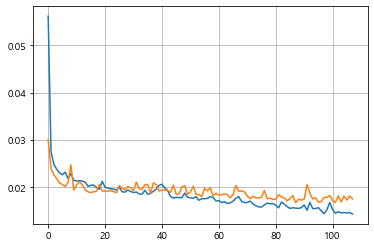

In [115]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.grid()

In [116]:
score = model.evaluate(X_test, Y_test, verbose= 0)
print('loss: ', score)

loss:  0.02142051124729175


In [117]:
df.fillna(0, inplace= True)

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [118]:
np.array(df.iloc[0][['검진 시 연령','키','체중','허리둘레']]).shape

(4,)

In [132]:
a = np.array(df.iloc[0][['검진 시 연령','키','체중','허리둘레']])
a = a.reshape(1, -1)
b = minmaxscaler.transform(a)
b = b.reshape(-1,4)
b.shape

(1, 4)

In [133]:
c= model.predict(b)

In [134]:
d = minmaxscaler.inverse_transform(c)
d

array([[101.]], dtype=float32)

In [135]:
for i in range(0, len(df)):
    if df['총콜레스테롤'][i] == 0:
        a = np.array(df.iloc[i][['검진 시 연령','키','체중','허리둘레']])
        a = a.reshape(1, -1)
        b = minmaxscaler.transform(a)
        b = b.reshape(-1,4)
        c= model.predict(b)
        df['총콜레스테롤'][i] = minmaxscaler.inverse_transform(c)

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

c:\users\007\anaconda3\envs\machinelearning\lib\site-packages\IPython\core\interactiveshell.py:3417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [138]:
df.to_csv('../datasets/ch_predict.csv')